In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#nur um zu sehen ob das funktioniert
from uncertainties import ufloat
#import uncertainties.unumpy as unp

import sys
sys.path.insert(0,"../")
from utils import ShorthandFormatter, lp, dp
fmtr = ShorthandFormatter()


In [2]:
def lorentz(x, x0, gamma):
    return gamma/((x-x0)**2 + gamma**2)/np.pi

def find_equal(a, b):
    eq_indexes = []
    for i in range(1, len(a)):
        if (b[i-1] <= a[i] and b[i] >= a[i]) or (b[i-1] >= a[i] and b[i] <= a[i]):
            eq_indexes.append(i)
    return eq_indexes

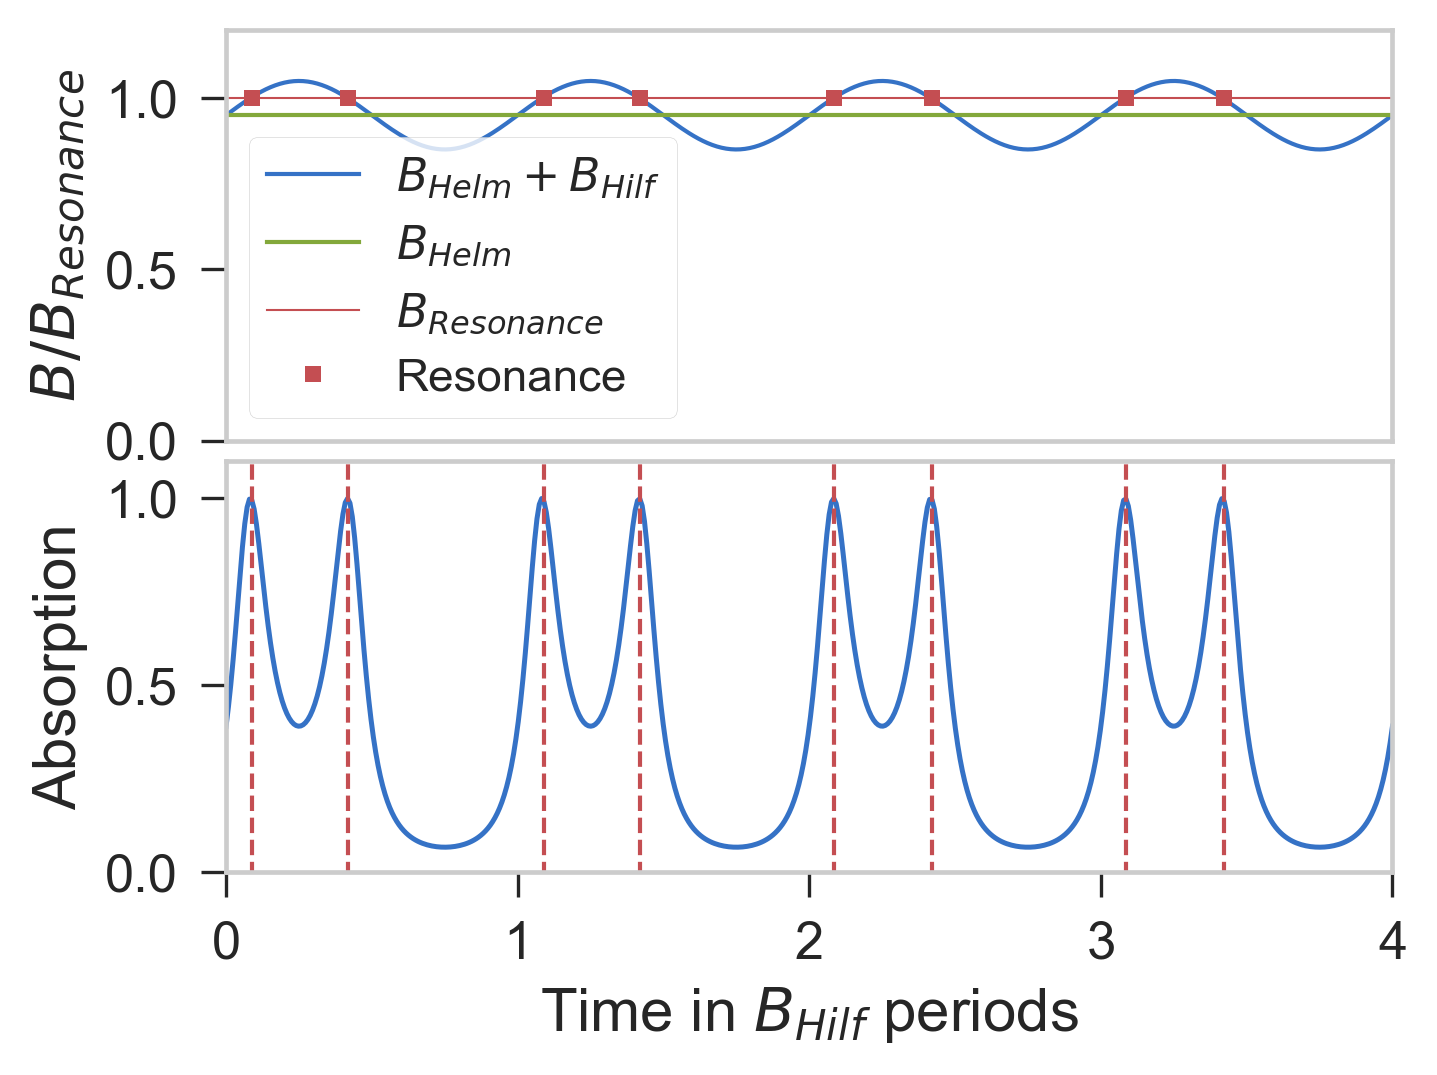

In [70]:
lp()

x = np.linspace(0, 4, 500)

b_res = np.zeros(len(x)) + 1

modulation = 0.1
offset = -0.05
b_real = modulation*np.sin(2*np.pi*x) + b_res + offset

intersections_indexes = find_equal(b_res, b_real)
intersections = {'x': x[intersections_indexes], 'y': np.zeros(len(intersections_indexes)) + b_res[0]}

width = 0.04
absorptions = lorentz(b_real, b_res, width)/lorentz(0, 0, width)

xlim = (0,4)

#do the plots
fig, ax = plt.subplots(2)
ax[0].plot(x, b_real, 'b-', linewidth = 1, label = r'$B_{Helm} + B_{Hilf}$')
ax[0].plot(x, b_res + offset, 'g-', linewidth = 1, label = r'$B_{Helm}$')
ax[0].plot(x, b_res, 'r-', linewidth = 0.5, label = r'$B_{Resonance}$')
ax[0].plot([i for i in intersections['x']], [i for i in intersections['y']], 'rs', markersize = 4, label = 'Resonance')

ax[0].set_xticks([])
ax[0].set_xlim(xlim)
ax[0].set_ylim(0,1.2)

ax[0].set_ylabel(r'$B/B_{Resonance}$')
ax[0].legend(fontsize = 'small')

ax[1].plot(x, absorptions, 'b-', label = 'absorption')
for x_a in intersections['x']:
    ax[1].plot((x_a,x_a), (-20,20), 'r--', linewidth = 1)

ax[1].set_xlim(xlim)
ax[1].set_ylim(0, 1.1)

ax[1].set_xlabel('Time in $B_{Hilf}$ periods')
ax[1].set_ylabel('Absorption')

plt.subplots_adjust(right = 0.99, hspace = 0.05)

plt.savefig('Fotos/Absorption_not_tuned')
plt.show()

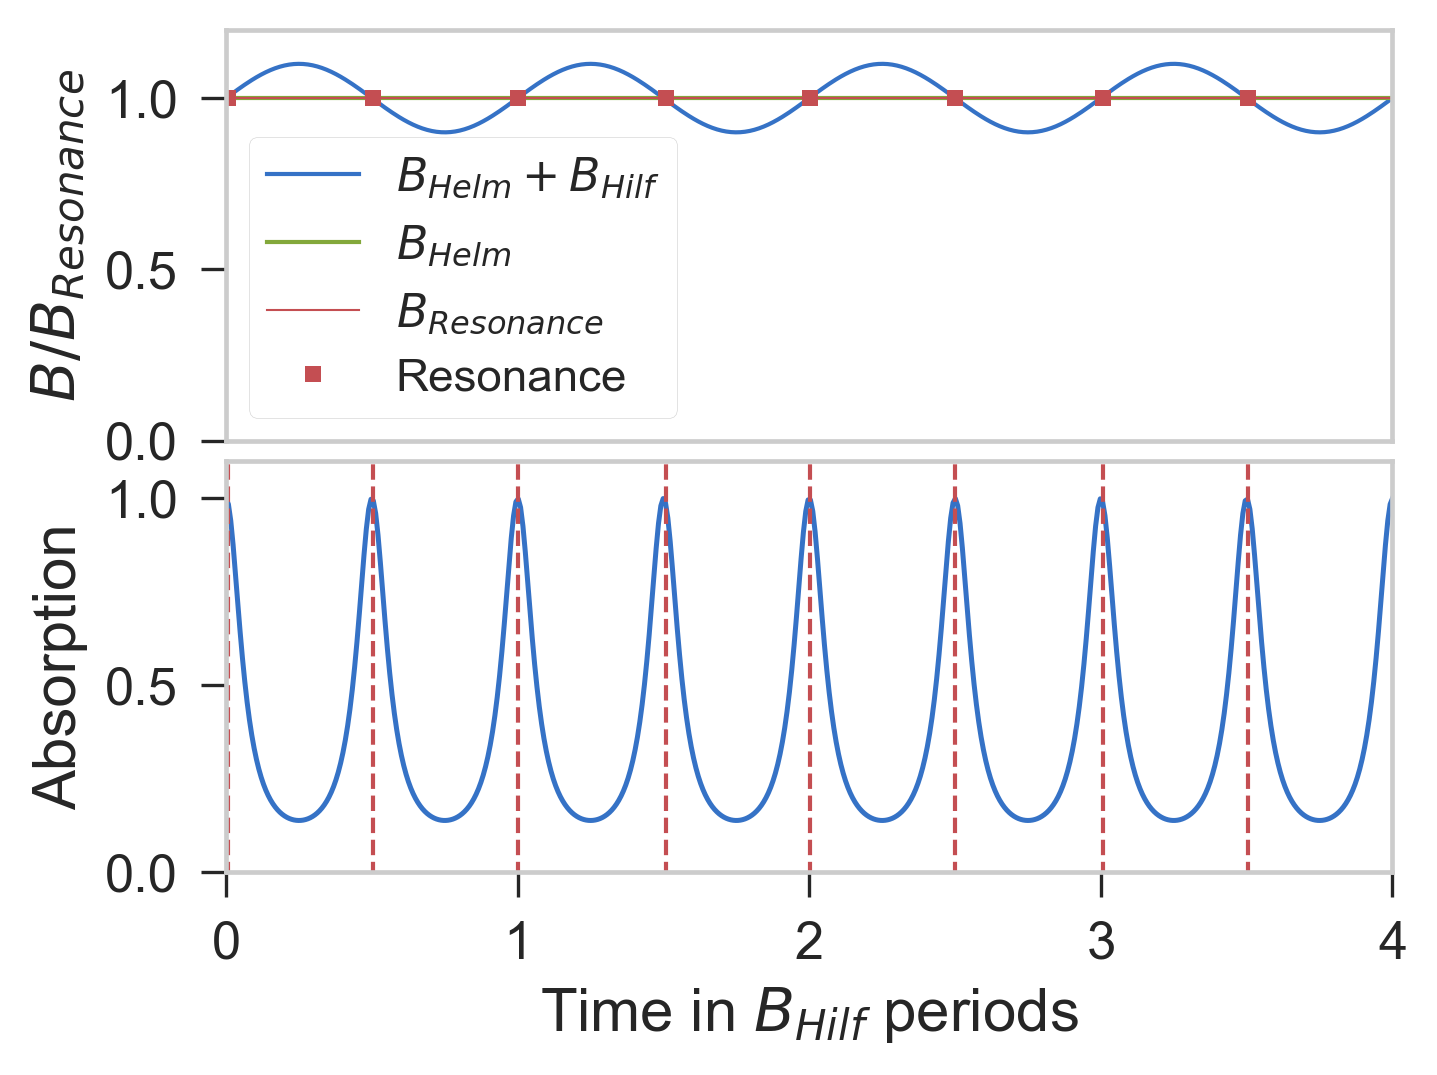

In [74]:
lp()
x = np.linspace(0, 4, 500)

b_res = np.zeros(len(x)) + 1

modulation = 0.1
offset = 0
b_real = modulation*np.sin(2*np.pi*x) + b_res + offset

intersections_indexes = find_equal(b_res, b_real)
intersections = {'x': x[intersections_indexes], 'y': np.zeros(len(intersections_indexes)) + b_res[0]}

width = 0.04
absorptions = lorentz(b_real, b_res, width)/lorentz(0, 0, width)

#do the plots
fig, ax = plt.subplots(2)
ax[0].plot(x, b_real, 'b-', linewidth = 1, label = r'$B_{Helm} + B_{Hilf}$')
ax[0].plot(x, b_res + offset, 'g-', linewidth = 1, label = r'$B_{Helm}$')
ax[0].plot(x, b_res, 'r-', linewidth = 0.5, label = r'$B_{Resonance}$')
ax[0].plot([i for i in intersections['x']], [i for i in intersections['y']], 'rs', markersize = 4, label = 'Resonance')

ax[0].set_xticks([])
ax[0].set_xlim(xlim)
ax[0].set_ylim(0,1.2)

ax[0].set_ylabel(r'$B/B_{Resonance}$')
ax[0].legend(fontsize = 'small')

ax[1].plot(x, absorptions, 'b-', label = 'absorption')
for x_a in intersections['x']:
    ax[1].plot((x_a,x_a), (-20,20), 'r--', linewidth = 1)

ax[1].set_xlim(xlim)
ax[1].set_ylim(0, 1.1)

ax[1].set_xlabel('Time in $B_{Hilf}$ periods')
ax[1].set_ylabel('Absorption')

plt.subplots_adjust(right = 0.99, hspace = 0.05)

plt.savefig('Fotos/Absorption_tuned')
plt.show()

In [21]:
plt.close()